In [106]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [107]:
df =pd.read_csv('Fraud.csv')
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [109]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [110]:
# Exploring transaction type
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [111]:
 # removing outliers in 'amount'
from scipy import stats
df = df[(np.abs(stats.zscore(df['amount'])) < 3)]  # removing outliers in 'amount'


EDA: Exploratory data analysis

In [112]:
# Exploring transaction type
df.type.value_counts()

type
CASH_OUT    2236639
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     488825
DEBIT         41432
Name: count, dtype: int64

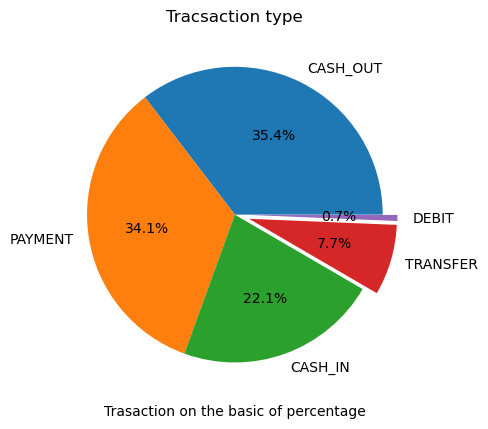

In [113]:
type_counts = df['type'].value_counts()
explode=[0,0,0,0.1,0.1]
# Plot the pie chart
plt.pie(type_counts, labels=type_counts.index,explode=explode,autopct='%1.1f%%')
plt.title("Tracsaction type")
plt.xlabel("Trasaction on the basic of percentage")
# Show the plot
plt.show()

In [114]:
df1 = df['nameDest'].str[0]

# Count the number of Merchants ('M') and Customers ('C')
merchant_count = df1.value_counts().get('M', 0)
customer_count = df1.value_counts().get('C', 0)

print(f"Number of Merchants (M): {merchant_count}")
print(f"Number of Customers (C): {customer_count}")


Number of Merchants (M): 2151495
Number of Customers (C): 4166180


In [115]:
df.shape

(6317675, 11)

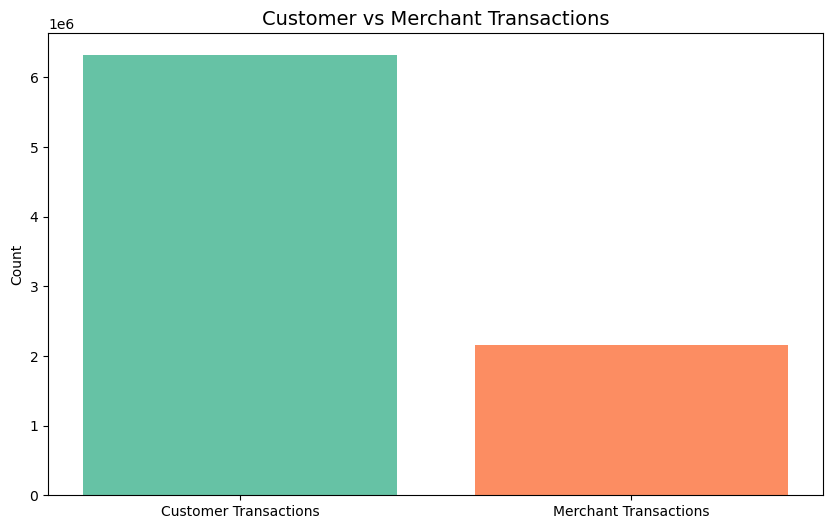

In [116]:
df['isCustomer'] = df['nameOrig'].str.startswith('C')
df['isMerchant'] = df['nameDest'].str.startswith('M')

# Count the number of customer and merchant transactions
customer_transactions = df['isCustomer'].sum()
merchant_transactions = df['isMerchant'].sum()

# Plot the difference between customer and merchant transactions
plt.figure(figsize=(10, 6))
plt.bar(['Customer Transactions', 'Merchant Transactions'], [customer_transactions, merchant_transactions], 
        color=['#66c2a5', '#fc8d62'])
plt.title('Customer vs Merchant Transactions', fontsize=14)
plt.ylabel('Count')
plt.show()

In [117]:
df1 = pd.DataFrame(df)

# Count the number of 0's and 1's in the 'isFraud' column
zeros = df1['isFraud'].value_counts().get(0, 0)
ones = df1['isFraud'].value_counts().get(1, 0)

print(f"Number of zeros (isFraud = 0): {zeros}")
print(f"Number of ones (isFraud = 1): {ones}")


Number of zeros (isFraud = 0): 6311148
Number of ones (isFraud = 1): 6527


In [118]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isCustomer,isMerchant
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,True,True
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,True,True
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,True,False
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,True,True


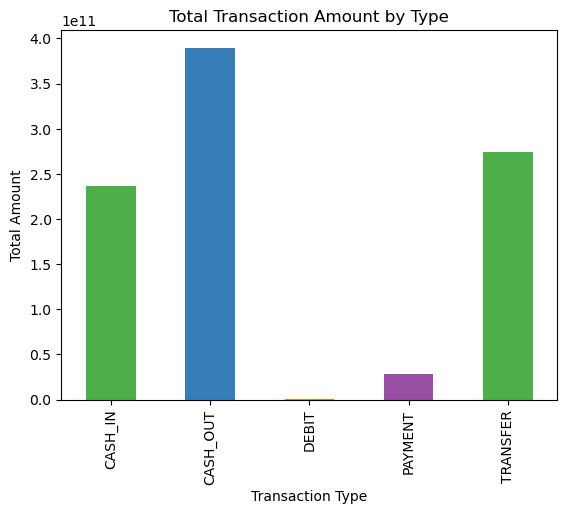

In [119]:

df.groupby('type')['amount'].sum().plot(kind='bar', color=['#4daf4a', '#377eb8', '#ff7f00', '#984ea3'])
plt.title('Total Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Total Amount')
plt.show()

In [120]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isCustomer,isMerchant
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,True,True
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,True,True
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,True,False
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,True,True


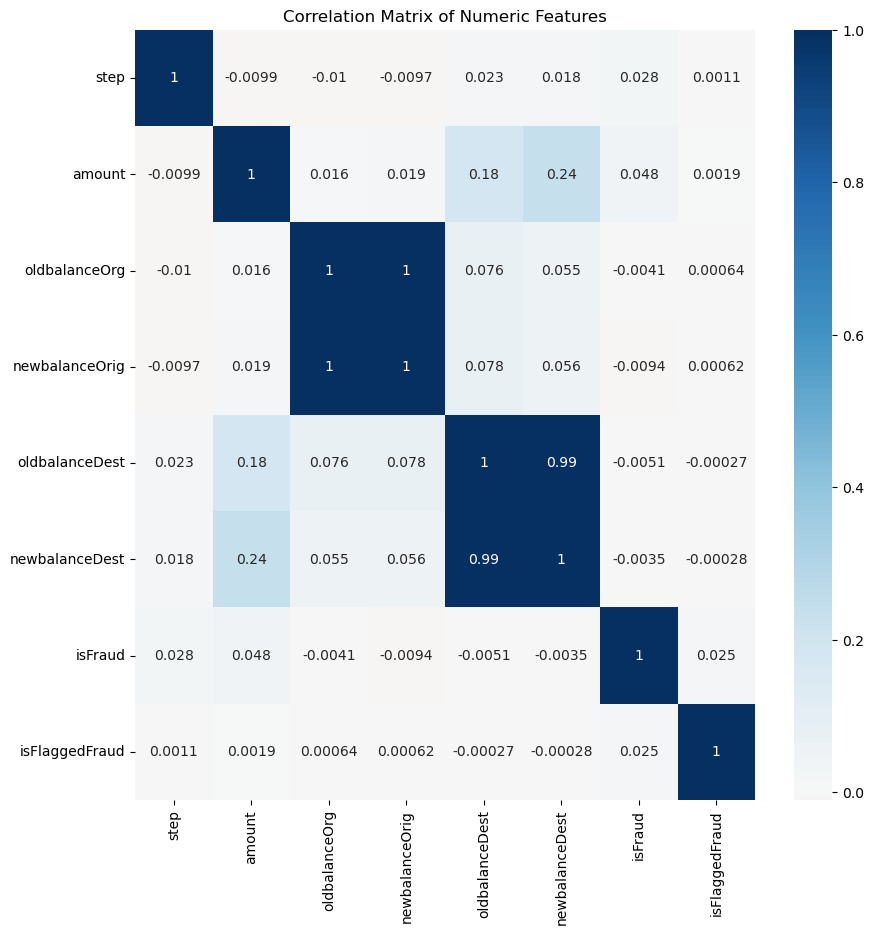

In [121]:
numeric_df = df.select_dtypes(include='number')

# Generate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(data=corr_matrix, annot=True, cmap='RdBu', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [122]:
df['log_amount'] = np.log1p(df['amount'])  # log transformation to handle skewed data


In [123]:
df['balance_change'] = df['oldbalanceOrg'] - df['newbalanceOrig']


In [125]:
X = df[['amount', 'isCustomer', 'isMerchant']]  # Add more relevant features as needed
y = df['isFraud']  # Target variable


In [126]:
# Import the necessary module
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [127]:
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(x_train)

# Transform the training and testing data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test) 

Model_LR = LogisticRegression()
Model_LR.fit(x_train_scaled, y_train)
y_pred_LR = Model_LR.predict(x_test_scaled)

# Quick evaluation
Train_Accuracy = Model_LR.score(x_train_scaled, y_train)
Test_Accuracy = Model_LR.score(x_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 99.90 %
Testing accuracy: 99.90 %


In [128]:
cv_scores = cross_val_score(Model_LR, x_train_scaled, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.99896775 0.99896775 0.99896775 0.99896775 0.99896775]
Mean CV Score: 0.9989677485295217


In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
Model_DT = DecisionTreeClassifier()
Model_DT.fit(x_train_scaled, y_train)
y_pred_DT = Model_DT.predict(x_test_scaled)

Train_Accuracy = Model_DT.score(x_train_scaled, y_train)
Test_Accuracy = Model_DT.score(x_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 99.98 %
Testing accuracy: 99.88 %


In [130]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost Classifier
Model_XGB = XGBClassifier()

# Fit the model on the scaled training data
Model_XGB.fit(x_train_scaled, y_train)

# Predict on the scaled test data
y_pred_XGB = Model_XGB.predict(x_test_scaled)

# Calculate training and testing accuracy
Train_Accuracy_XGB = Model_XGB.score(x_train_scaled, y_train)
Test_Accuracy_XGB = Model_XGB.score(x_test_scaled, y_test)

# Print training and testing accuracy
print(f'Training accuracy (XGBoost): {Train_Accuracy_XGB*100:.2f} %')
print(f'Testing accuracy (XGBoost): {Test_Accuracy_XGB*100:.2f} %')




Training accuracy (XGBoost): 99.90 %
Testing accuracy (XGBoost): 99.90 %


In [131]:
features = np.array([[1, 8765, 90.60]])
print(Model_LR.predict(features))

[0]


In [132]:
features = np.array([[1, 9, 8800.10]])
print(Model_DT.predict(features))

[0]


In [133]:
features = np.array([[1, 960.60, 900.0]])
print(Model_XGB.predict(features))

[0]


In [134]:
import pickle

# Save Logistic Regression model
pickle.dump(Model_LR, open('logistic_model.pkl', 'wb'))

# Save Decision Tree model
pickle.dump(Model_DT, open('decision_tree_model.pkl', 'wb'))

# Save XGBoost model
pickle.dump(Model_XGB, open('xgboost_model.pkl', 'wb'))

# Save the Standard Scaler
pickle.dump(scaler, open('scaler.pkl', 'wb'))


In [135]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle

# Load the models and scaler (assuming you've saved them using pickle)
Model_LR = pickle.load(open('logistic_model.pkl', 'rb'))
Model_DT = pickle.load(open('decision_tree_model.pkl', 'rb'))
Model_XGB = pickle.load(open('xgboost_model.pkl', 'rb'))

# Load the Standard Scaler
scaler = pickle.load(open('scaler.pkl', 'rb'))

# Define a function to make predictions using different models
def make_prediction(model, amount, is_customer, is_merchant):
    input_features = np.array([[amount, is_customer, is_merchant]])
    scaled_features = scaler.transform(input_features)
    prediction = model.predict(scaled_features)
    
    if prediction[0] == 1:
        return "Warning: Fraudulent transaction detected!"
    else:
        return "Transaction is legitimate."

# Input transaction details (you can also use input() to collect user inputs dynamically)
amount = float(input("Enter transaction amount: "))  # e.g., 5000.0
is_customer = int(input("Is the transaction from a customer? (1 for Yes, 0 for No): "))  # 1 for Yes, 0 for No
is_merchant = int(input("Is the transaction to a merchant? (1 for Yes, 0 for No): "))  # 1 for Yes, 0 for No

# Choose model for prediction (Logistic Regression, Decision Tree, XGBoost)
model_choice = input("Choose a model (LR for Logistic Regression, DT for Decision Tree, XGB for XGBoost): ")

# Predict using the chosen model
if model_choice == 'LR':
    result = make_prediction(Model_LR, amount, is_customer, is_merchant)
elif model_choice == 'DT':
    result = make_prediction(Model_DT, amount, is_customer, is_merchant)
elif model_choice == 'XGB':
    result = make_prediction(Model_XGB, amount, is_customer, is_merchant)
else:
    result = "Invalid model choice. Please choose LR, DT, or XGB."

# Display the result
print(result)


Enter transaction amount:  5000
Is the transaction from a customer? (1 for Yes, 0 for No):  0
Is the transaction to a merchant? (1 for Yes, 0 for No):  0
Choose a model (LR for Logistic Regression, DT for Decision Tree, XGB for XGBoost):  LR


Transaction is legitimate.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
